# ISLR Chapter 10.4 to 10.6 Lab - PCA, Clustering

# 10.4 - Lab 1: Principal Components Analysis

[1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"

[1] "Murder"   "Assault"  "UrbanPop" "Rape"

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

[1] "sdev"     "rotation" "center"   "scale"    "x"

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


[1] 50  4

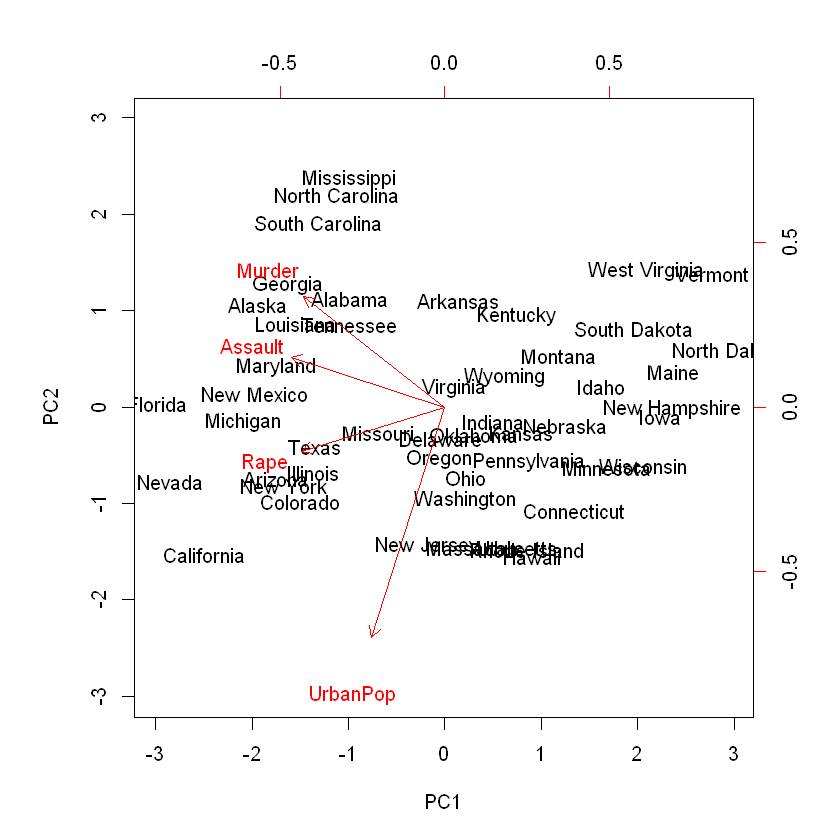

[1] 1.5748783 0.9948694 0.5971291 0.4164494

[1] 2.4802416 0.9897652 0.3565632 0.1734301

[1] 0.62006039 0.24744129 0.08914080 0.04335752

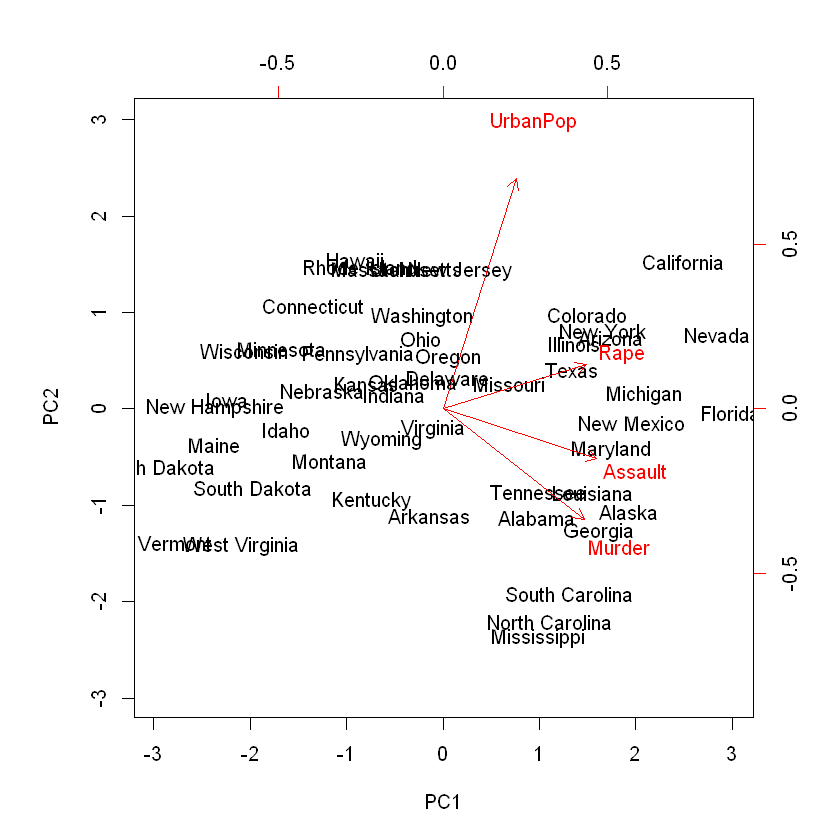

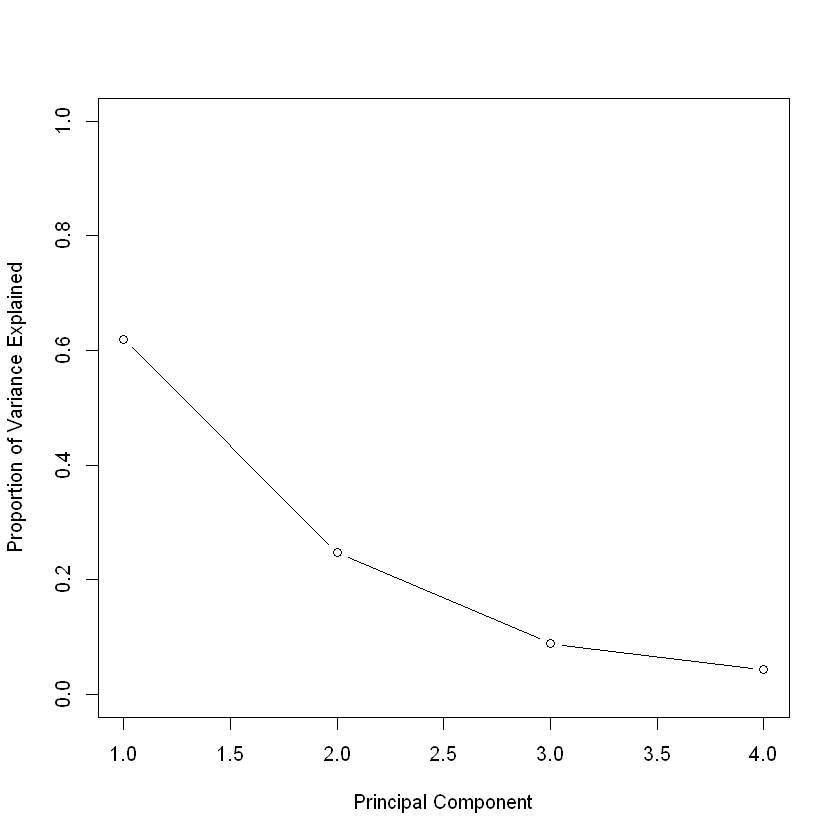

[1]  1  3 11  8

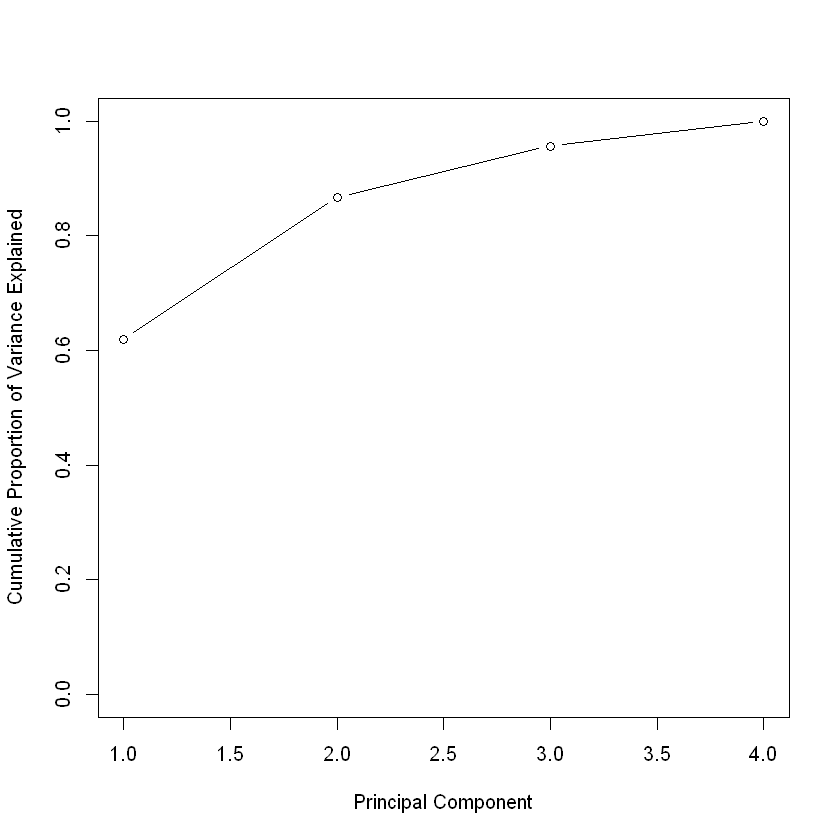

In [1]:
states=row.names(USArrests)
states
names(USArrests)
apply(USArrests, 2, mean)
apply(USArrests, 2, var)
pr.out=prcomp(USArrests, scale=TRUE)
names(pr.out)
pr.out$center
pr.out$scale
pr.out$rotation
dim(pr.out$x)
biplot(pr.out, scale=0)
pr.out$rotation=-pr.out$rotation
pr.out$x=-pr.out$x
biplot(pr.out, scale=0)
pr.out$sdev
pr.var=pr.out$sdev^2
pr.var
pve=pr.var/sum(pr.var)
pve
plot(pve, xlab="Principal Component", ylab="Proportion of Variance Explained", ylim=c(0,1),type='b')
plot(cumsum(pve), xlab="Principal Component", ylab="Cumulative Proportion of Variance Explained", ylim=c(0,1),type='b')
a=c(1,2,8,-3)
cumsum(a)

This lab on K-Means and Hierarchical Clustering in R is an adaptation of p. 404-407, 410-413 of "Introduction to
Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert
Tibshirani.


# 10.5.1 K-Means Clustering
The function `kmeans()` performs K-means clustering in R. We begin with
a simple simulated example in which there truly are two clusters in the
data: the first 25 observations have a mean shift relative to the next 25
observations.

In [2]:
set.seed(2)
x = matrix(rnorm(50*2), ncol = 2)

x[1:25,1] = x[1:25,1]+3
x[1:25,2] = x[1:25,2]-4

x = as.data.frame(x)

We now perform K-means clustering with `K = 2`:

In [3]:
km_out = kmeans(x, 2, nstart = 20)

The cluster assignments of the 50 observations are contained in
`km_out$cluster`:

In [4]:
km_out$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

The K-means clustering perfectly separated the observations into two clusters
even though we did not supply any group information to `kmeans()`. We
can plot the data, with each observation colored according to its cluster
assignment:

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\willi\AppData\Local\Temp\RtmpmYDfrB\downloaded_packages

  There is a binary version available but the source version is later:
      binary source needs_compilation
dplyr  1.0.5  1.0.6              TRUE

  Binaries will be installed
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\willi\AppData\Local\Temp\RtmpmYDfrB\downloaded_packages
package 'broom' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\willi\AppData\Local\Temp\RtmpmYDfrB\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'broom' was built under R version 3.6.3"


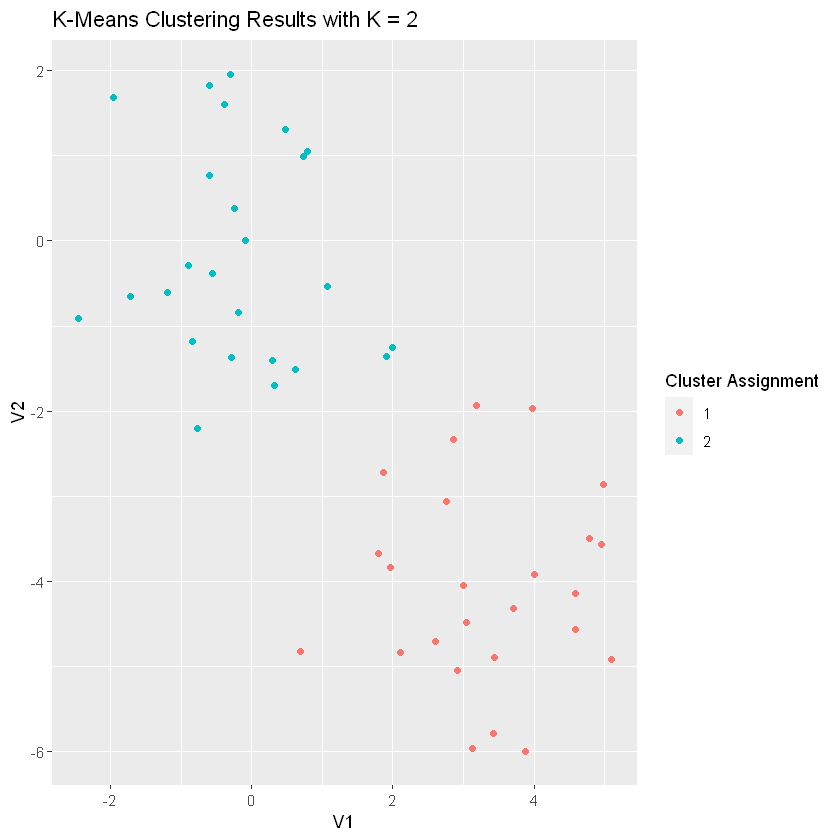

In [5]:
install.packages("ggplot2", repos='http://cran.us.r-project.org')
install.packages("dplyr", repos='http://cran.us.r-project.org')
install.packages("broom", repos='http://cran.us.r-project.org')
library(ggplot2)
library(dplyr)
library(broom)

assignments <- augment(km_out, x)

ggplot(data = assignments) +
    geom_point(aes(x = V1, y = V2, color = .cluster)) +
    labs(color = "Cluster Assignment",
         title = "K-Means Clustering Results with K = 2")

Here the observations can be easily plotted because they are two-dimensional.
If there were more than two variables then we could instead perform PCA
and plot the first two principal components score vectors.

In this example, we knew that there really were two clusters because
we generated the data. However, for real data, in general we do not know
the true number of clusters. We could instead have performed K-means
clustering on this example with `K  =  3`. If we do this, K-means clustering will split up the two "real" clusters, since it has no information about them:

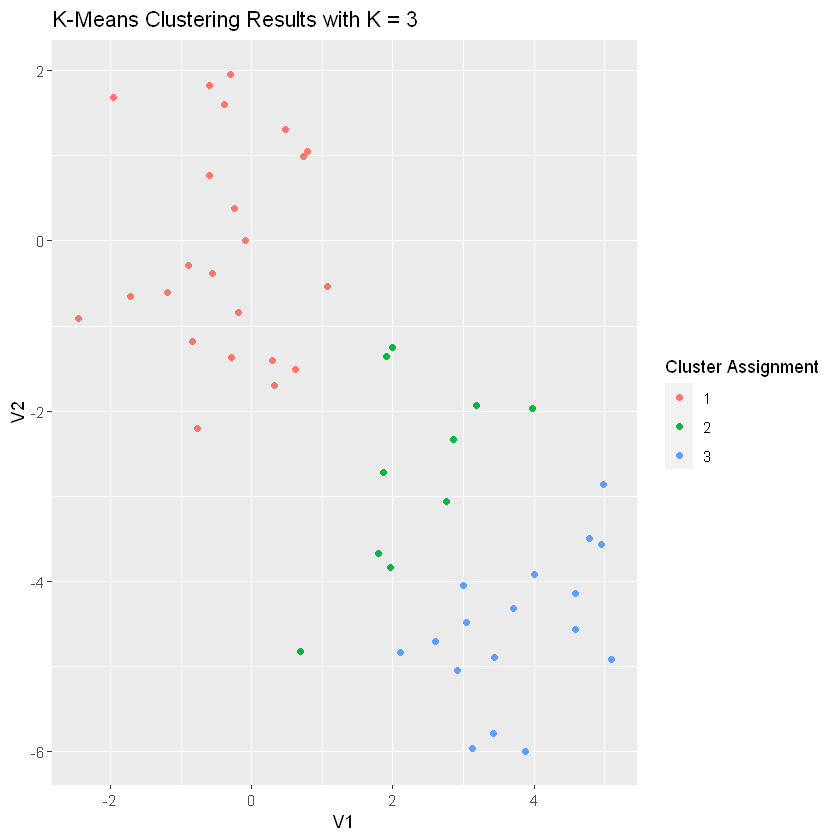

In [6]:
km_out_3clust = kmeans(x, 3, nstart = 20)

assignments_3clust <- augment(km_out_3clust, x)

ggplot(data = assignments_3clust) +
    geom_point(aes(x = V1, y = V2, color = .cluster)) +
    labs(color = "Cluster Assignment",
         title = "K-Means Clustering Results with K = 3")

To run the `kmeans()` function in R with multiple initial cluster assignments,
we use the `nstart` argument. If a value of `nstart` greater than one
is used, then K-means clustering will be performed using multiple random
assignments, and the `kmeans()` function will
report only the best results. Here we compare using `nstart = 1`:

In [7]:
set.seed(3)
km_out_single_run = kmeans(x, 3, nstart = 1)
km_out_single_run$tot.withinss

[1] 97.97927

to `nstart = 20`:

In [8]:
km_out_20_runs = kmeans(x, 3, nstart = 20)
km_out_20_runs$tot.withinss

[1] 97.97927

Note that `km_out$tot.withinss` is the total within-cluster sum of squares,
which we seek to minimize by performing K-means clustering. The individual within-cluster sum-of-squares are contained in the
vector `km_out$withinss`.

It is generally recommended to always run K-means clustering with a large
value of `nstart`, such as 20 or 50 to avoid getting stuck in an undesirable local
optimum.

When performing K-means clustering, in addition to using multiple initial
cluster assignments, it is also important to set a random seed using the
`set.seed()` function. This way, the initial cluster assignments can
be replicated, and the K-means output will be fully reproducible.

# 10.5.2 Hierarchical Clustering
The `hclust()` function implements hierarchical clustering in R. In the following example we use the data from the previous section to plot the hierarchical
clustering dendrogram using complete, single, and average linkage clustering,
with Euclidean distance as the dissimilarity measure. We begin by
clustering observations using complete linkage. The `dist()` function is used
to compute the 50 $\times$ 50 inter-observation Euclidean distance matrix:

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 3 4 3 3 3 3 3 3 3 3

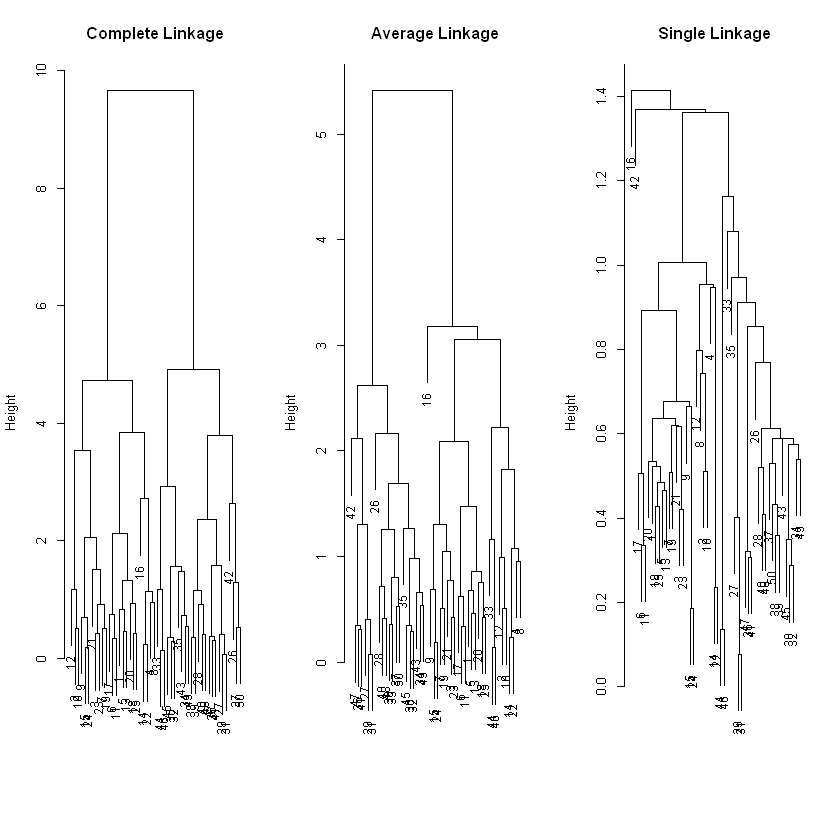

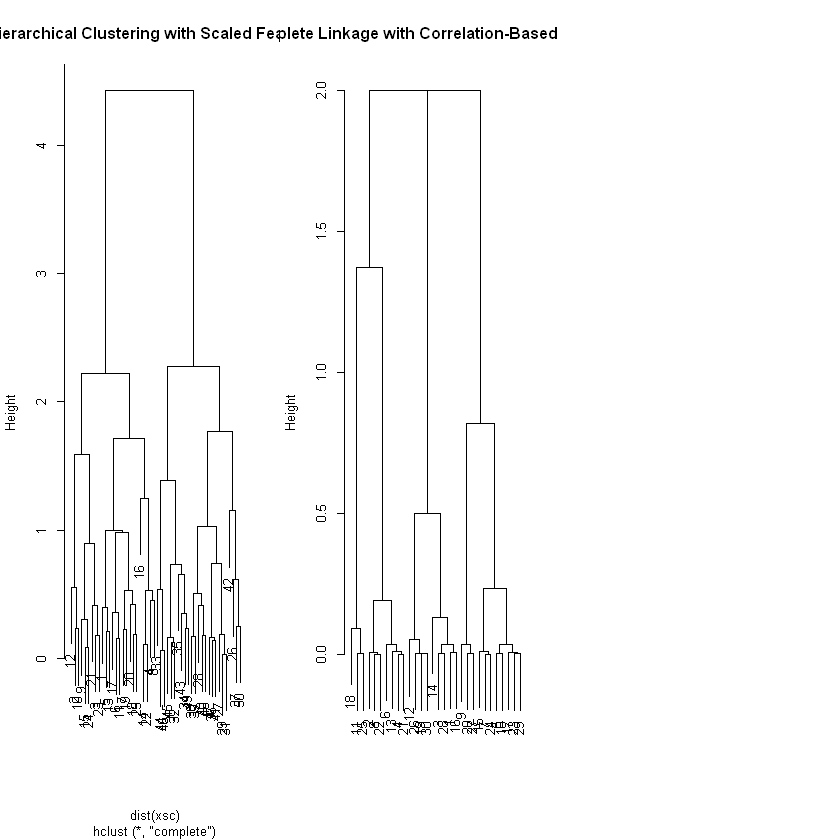

In [9]:
hc.complete=hclust(dist(x), method="complete")
hc.average=hclust(dist(x), method="average")
hc.single=hclust(dist(x), method="single")
par(mfrow=c(1,3))
plot(hc.complete,main="Complete Linkage", xlab="", sub="", cex=.9)
plot(hc.average, main="Average Linkage", xlab="", sub="", cex=.9)
plot(hc.single, main="Single Linkage", xlab="", sub="", cex=.9)
cutree(hc.complete, 2)
cutree(hc.average, 2)
cutree(hc.single, 2)
cutree(hc.single, 4)
xsc=scale(x)
plot(hclust(dist(xsc), method="complete"), main="Hierarchical Clustering with Scaled Features")
x=matrix(rnorm(30*3), ncol=3)
dd=as.dist(1-cor(t(x)))
plot(hclust(dd, method="complete"), main="Complete Linkage with Correlation-Based Distance", xlab="", sub="")

In [10]:
hc_complete = hclust(dist(x), method = "complete")

We could just as easily perform hierarchical clustering with average or
single linkage instead:

In [11]:
hc_average = hclust(dist(x), method = "average")
hc_single = hclust(dist(x), method = "single")

We can now plot the dendrograms obtained using the usual `plot()` function.
The numbers at the bottom of the plot identify each observation:

In [12]:
library(gridExtra) # Fix the bug
library(ggdendro)
install.packages("gridExtra", repos='http://cran.us.r-project.org')
install.packages("ggdendro", repos='http://cran.us.r-project.org')

plot_complete = ggdendrogram(hc_complete, rotate = FALSE, size = 2) + labs(title = "Complete Linkage") 
plot_average = ggdendrogram(hc_average, rotate = FALSE, size = 2) + labs(title = "Average Linkage")
plot_single = ggdendrogram(hc_single, rotate = FALSE, size = 2) + labs(title = "Single Linkage")

grid.arrange(plot_complete, plot_average, plot_single)

ERROR: Error in library(gridExtra): there is no package called 'gridExtra'


To determine the cluster labels for each observation associated with a
given cut of the dendrogram, we can use the `cutree()` function:

In [13]:
cutree(hc_complete, 2)
cutree(hc_average, 2)
cutree(hc_single, 2)

[1] 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

[1] 1 2 1 2 2 2 1 2 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1

[1] 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

For this data, complete and average linkage generally separate the observations
into their correct groups. However, single linkage identifies one point
as belonging to its own cluster. A more sensible answer is obtained when
four clusters are selected, although there are still two singletons:

In [14]:
cutree(hc_single, 4)

[1] 1 2 2 3 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

To scale the variables before performing hierarchical clustering of the
observations, we can use the `scale()` function:

In [15]:
xsc = scale(x)

ggdendrogram(hclust(dist(xsc), method = "complete"), 
             rotate = FALSE, 
             size = 2) + 
labs(title = "Complete Linkage with Scaled Features")

ERROR: Error in ggdendrogram(hclust(dist(xsc), method = "complete"), rotate = FALSE, : could not find function "ggdendrogram"


Correlation-based distance can be computed using the `as.dist()` function, which converts an arbitrary square symmetric matrix into a form that
the `hclust()` function recognizes as a distance matrix. However, this only
makes sense for data with **at least three features** since the absolute correlation
between any two observations with measurements on two features is
always 1. Let's generate and cluster a three-dimensional data set:

In [16]:
x = matrix(rnorm(30*3), ncol = 3)
x_with_correlation_based_distance = as.dist(1 - cor(t(x)))

ggdendrogram(hclust(x_with_correlation_based_distance, method = "complete"), 
             rotate = FALSE, 
             size = 2) + 
labs(title = "Complete Linkage with Correlation-Based Distance")

ERROR: Error in ggdendrogram(hclust(x_with_correlation_based_distance, method = "complete"), : could not find function "ggdendrogram"


# 10.6: NCI60 Data Example

Unsupervised techniques are often used in the analysis of genomic data. In this portion of the lab, we'll see how hierarchical and K-means clustering compare on the `NCI60` cancer cell line microarray data, which
consists of 6,830 gene expression measurements on 64 cancer cell lines:

In [17]:
# The NCI60 data
install.packages("ISLR", repos='http://cran.us.r-project.org')
library(ISLR)
nci_labels = NCI60$labs
nci_data = NCI60$data

package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\willi\AppData\Local\Temp\RtmpmYDfrB\downloaded_packages


Warning message:
"package 'ISLR' was built under R version 3.6.3"


Each cell line is labeled with a cancer type. We'll ignore the
cancer types in performing clustering, as these are unsupervised
techniques. After performing clustering, we'll use this column to see the extent to which these cancer types agree with the results of these
unsupervised techniques.

The data has 64 rows and 6,830 columns.

In [18]:
dim(nci_data)

[1]   64 6830

Let's take a look at the cancer types for the cell lines:

In [19]:
table(nci_labels)

nci_labels
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

# 10.6.2 Clustering the Observations of the NCI60 Data
We now proceed to hierarchically cluster the cell lines in the `NCI60` data,
with the goal of finding out whether or not the observations cluster into
distinct types of cancer. To begin, we standardize the variables to have
mean zero and standard deviation one. This step is
optional, and need only be performed if we want each gene to be on the
same scale:

[1]   64 6830

[1] "CNS"   "CNS"   "CNS"   "RENAL"

nci.labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

Importance of components:
                           PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     27.8535 21.48136 19.82046 17.03256 15.97181 15.72108
Proportion of Variance  0.1136  0.06756  0.05752  0.04248  0.03735  0.03619
Cumulative Proportion   0.1136  0.18115  0.23867  0.28115  0.31850  0.35468
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     14.47145 13.54427 13.14400 12.73860 12.68672 12.15769
Proportion of Variance  0.03066  0.02686  0.02529  0.02376  0.02357  0.02164
Cumulative Proportion   0.38534  0.41220  0.43750  0.46126  0.48482  0.50646
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     11.83019 11.62554 11.43779 11.00051 10.65666 10.48880
Proportion of Variance  0.02049  0.01979  0.01915  0.01772  0.01663  0.01611
Cumulative Proportion   0.52695  0.54674  0.56590  0.58361  0.60024  0.61635
                           PC19    PC20     PC21    PC

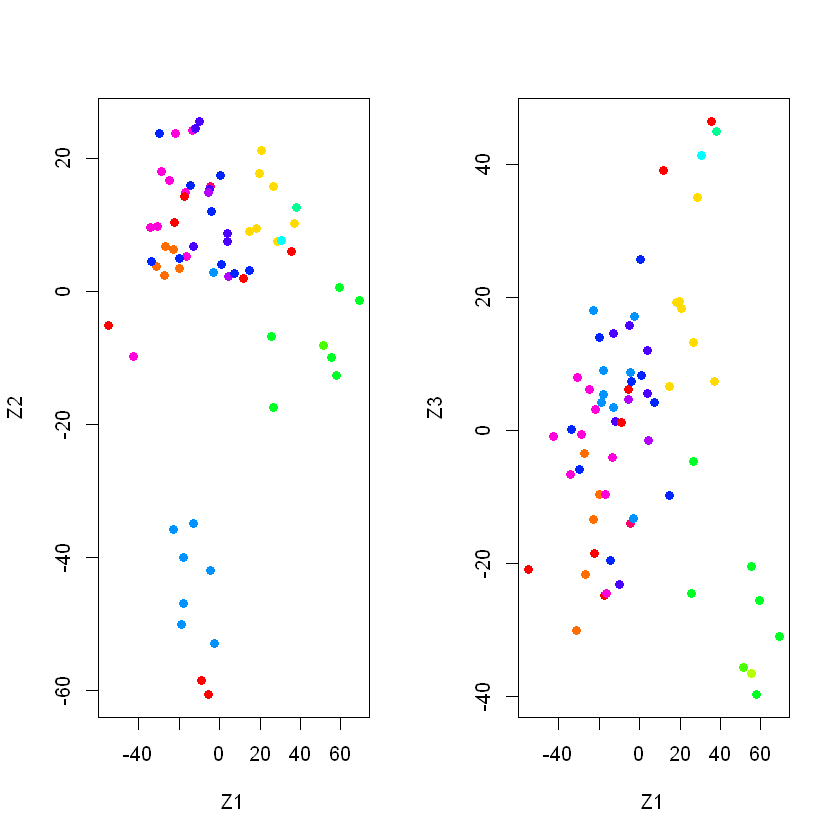

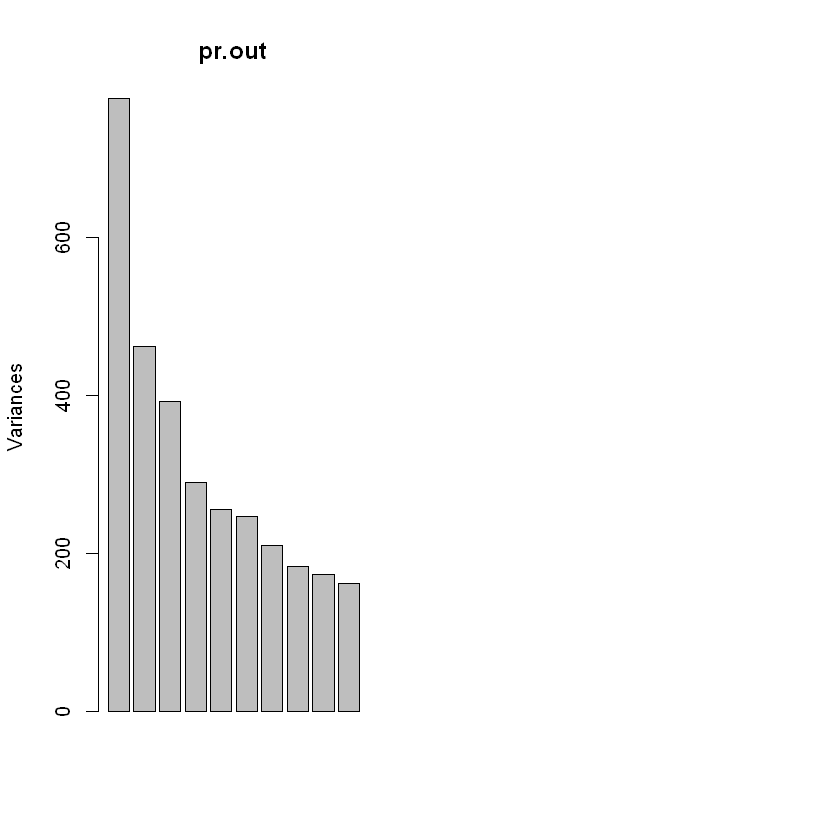

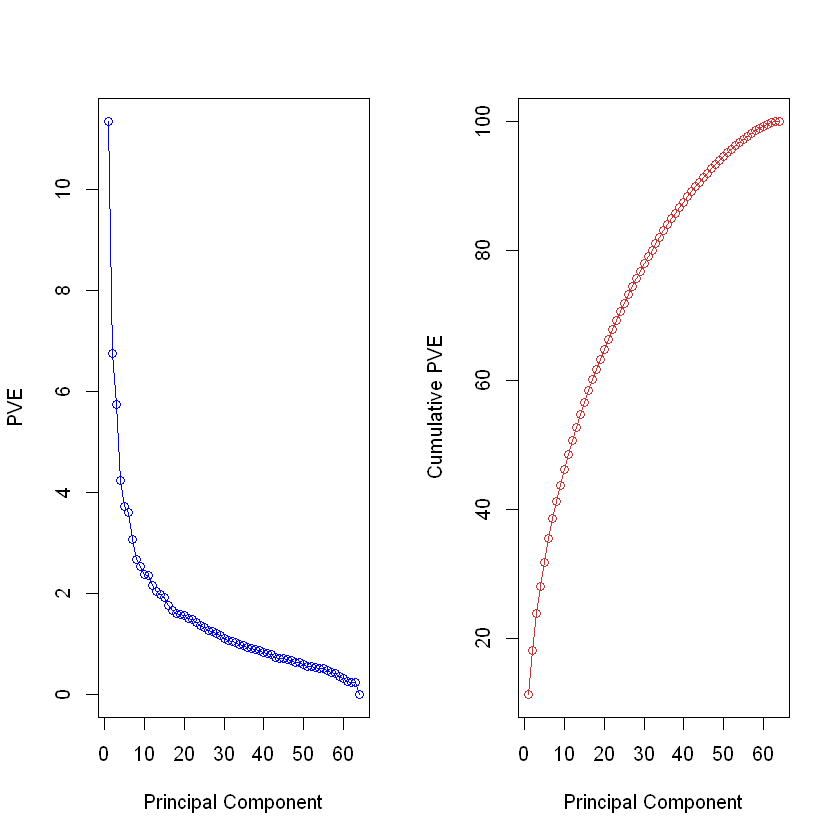

           nci.labs
hc.clusters BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro
          1      2   3     2           0           0        0           0
          2      3   2     0           0           0        0           0
          3      0   0     0           1           1        6           0
          4      2   0     5           0           0        0           1
           nci.labs
hc.clusters MCF7D-repro MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
          1           0        8     8       6        2     8       1
          2           0        0     1       0        0     1       0
          3           0        0     0       0        0     0       0
          4           1        0     0       0        0     0       0

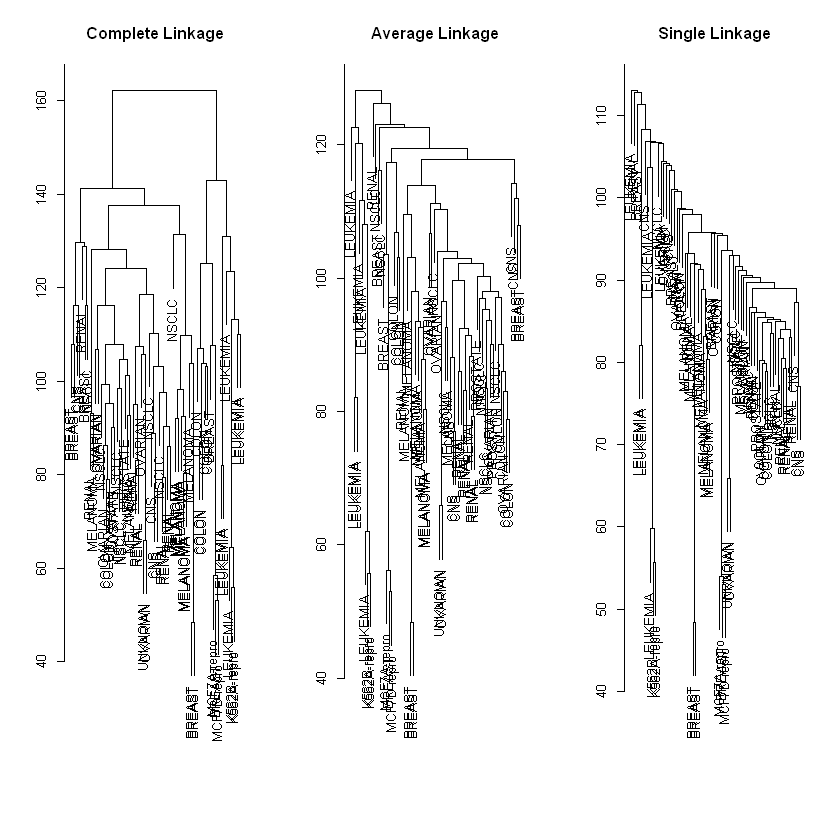


Call:
hclust(d = dist(sd.data))

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 64 


           hc.clusters
km.clusters  1  2  3  4
          1 11  0  0  9
          2 20  7  0  0
          3  9  0  0  0
          4  0  0  8  0

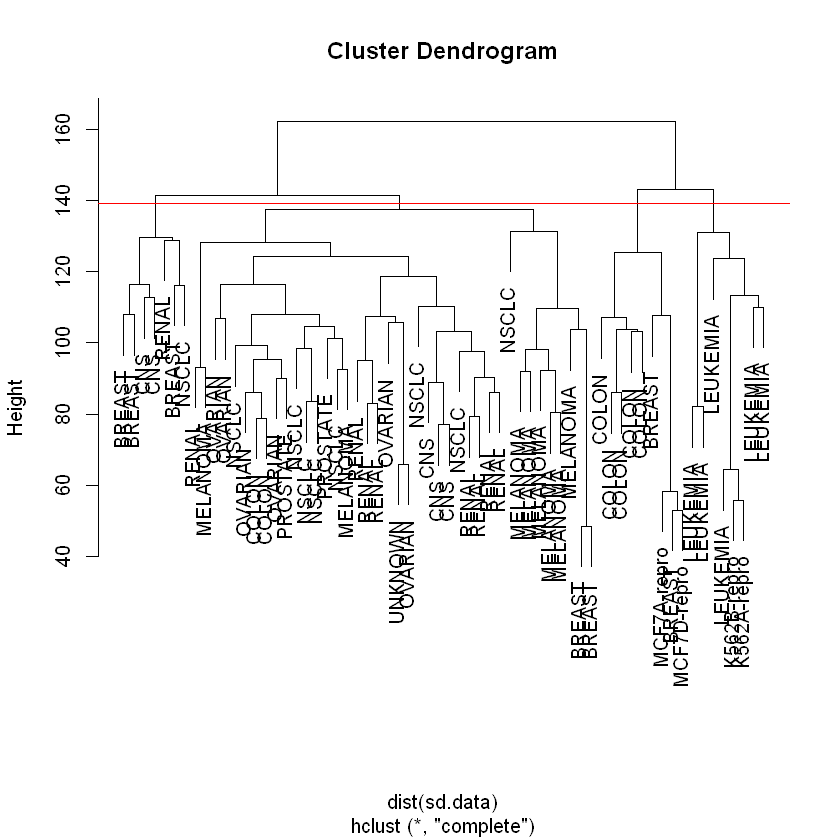

   nci.labs
    BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro MCF7D-repro
  1      0   2     7           0           0        2           0           0
  2      5   3     0           0           0        0           0           0
  3      0   0     0           1           1        4           0           0
  4      2   0     0           0           0        0           1           1
   nci.labs
    MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
  1        1     8       5        2     7       0
  2        7     1       1        0     2       1
  3        0     0       0        0     0       0
  4        0     0       0        0     0       0

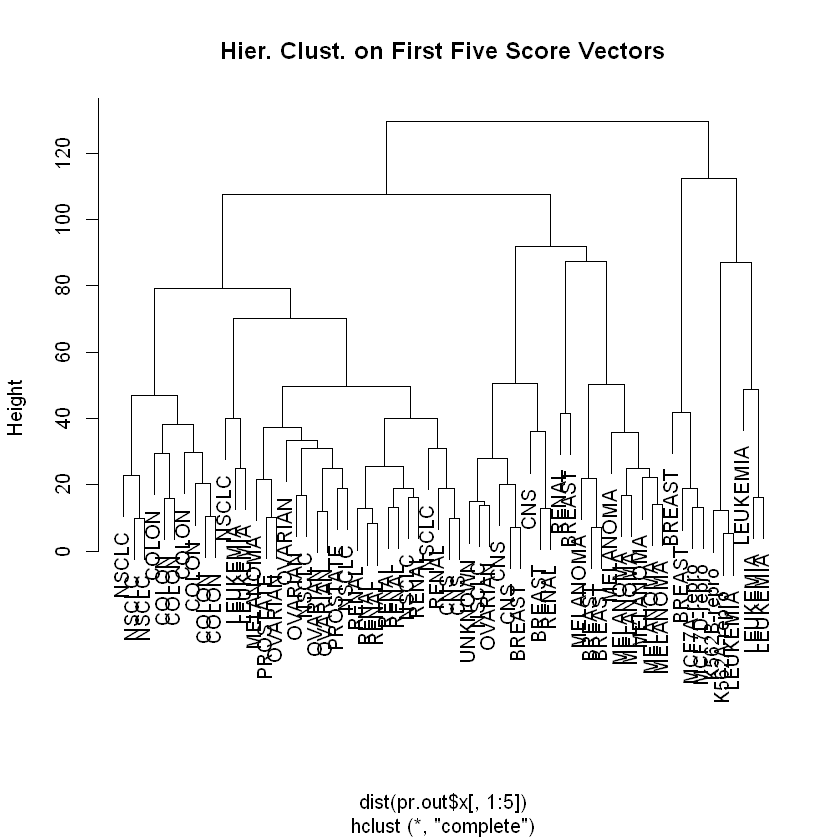

In [20]:
# The NCI60 data

library(ISLR)
nci.labs=NCI60$labs
nci.data=NCI60$data
dim(nci.data)
nci.labs[1:4]
table(nci.labs)

# PCA on the NCI60 Data

pr.out=prcomp(nci.data, scale=TRUE)
Cols=function(vec){
    cols=rainbow(length(unique(vec)))
    return(cols[as.numeric(as.factor(vec))])
  }
par(mfrow=c(1,2))
plot(pr.out$x[,1:2], col=Cols(nci.labs), pch=19,xlab="Z1",ylab="Z2")
plot(pr.out$x[,c(1,3)], col=Cols(nci.labs), pch=19,xlab="Z1",ylab="Z3")
summary(pr.out)
plot(pr.out)
pve=100*pr.out$sdev^2/sum(pr.out$sdev^2)
par(mfrow=c(1,2))
plot(pve,  type="o", ylab="PVE", xlab="Principal Component", col="blue")
plot(cumsum(pve), type="o", ylab="Cumulative PVE", xlab="Principal Component", col="brown3")

# Clustering the Observations of the NCI60 Data

sd.data=scale(nci.data)
par(mfrow=c(1,3))
data.dist=dist(sd.data)
plot(hclust(data.dist), labels=nci.labs, main="Complete Linkage", xlab="", sub="",ylab="")
plot(hclust(data.dist, method="average"), labels=nci.labs, main="Average Linkage", xlab="", sub="",ylab="")
plot(hclust(data.dist, method="single"), labels=nci.labs,  main="Single Linkage", xlab="", sub="",ylab="")
hc.out=hclust(dist(sd.data))
hc.clusters=cutree(hc.out,4)
table(hc.clusters,nci.labs)
par(mfrow=c(1,1))
plot(hc.out, labels=nci.labs)
abline(h=139, col="red")
hc.out
set.seed(2)
km.out=kmeans(sd.data, 4, nstart=20)
km.clusters=km.out$cluster
table(km.clusters,hc.clusters)
hc.out=hclust(dist(pr.out$x[,1:5]))
plot(hc.out, labels=nci.labs, main="Hier. Clust. on First Five Score Vectors")
table(cutree(hc.out,4), nci.labs)

In [21]:
scaled_nci_data = scale(nci_data)

We now perform hierarchical clustering of the observations using complete,
single, and average linkage. We'll use standard Euclidean distance as the dissimilarity
measure:

In [28]:
nci_hc_complete = hclust(dist(scaled_nci_data), method = "complete")
nci_hc_average = hclust(dist(scaled_nci_data), method = "average")
nci_hc_single = hclust(dist(scaled_nci_data), method = "single")

# Fix the bug
plot_complete_nci = ggdendrogram(nci_hc_complete, rotate = FALSE, size = 2) + labs(title = "NCI: Complete Linkage") 
plot_average_nci = ggdendrogram(nci_hc_average, rotate = FALSE, size = 2) + labs(title = "NCI: Average Linkage")
plot_single_nci = ggdendrogram(nci_hc_single, rotate = FALSE, size = 2) + labs(title = "NCI: Single Linkage")

grid.arrange(plot_complete_nci, plot_average_nci, plot_single_nci)

ERROR: Error in ggdendrogram(nci_hc_complete, rotate = FALSE, size = 2): could not find function "ggdendrogram"


We see that the choice of linkage
certainly does affect the results obtained. Typically, single linkage will tend
to yield trailing clusters: very large clusters onto which individual observations
attach one-by-one. On the other hand, complete and average linkage
tend to yield more balanced, attractive clusters. For this reason, complete
and average linkage are generally preferred to single linkage. Clearly cell
lines within a single cancer type do tend to cluster together, although the
clustering is not perfect. 

Let's use our complete linkage hierarchical clustering
for the analysis. We can cut the dendrogram at the height that will yield a particular
number of clusters, say 4:

In [23]:
hc_clusters = cutree(nci_hc_complete, 4)
table(nci_labels, hc_clusters)

             hc_clusters
nci_labels    1 2 3 4
  BREAST      2 3 0 2
  CNS         3 2 0 0
  COLON       2 0 0 5
  K562A-repro 0 0 1 0
  K562B-repro 0 0 1 0
  LEUKEMIA    0 0 6 0
  MCF7A-repro 0 0 0 1
  MCF7D-repro 0 0 0 1
  MELANOMA    8 0 0 0
  NSCLC       8 1 0 0
  OVARIAN     6 0 0 0
  PROSTATE    2 0 0 0
  RENAL       8 1 0 0
  UNKNOWN     1 0 0 0

There are some clear patterns. All the leukemia cell lines fall in cluster 3,
while the breast cancer cell lines are spread out over three different clusters.
We can plot the cut on the dendrogram that produces these four clusters by adding a `geom_hline()`, which draws a horizontal line on top of our plot:

In [24]:
ggdendrogram(nci_hc_complete, rotate = FALSE, size = 2) + 
    labs(title = "NCI: Complete Linkage") +
    geom_hline(yintercept = 139, color = "red")

ERROR: Error in ggdendrogram(nci_hc_complete, rotate = FALSE, size = 2): could not find function "ggdendrogram"


Printing the output of `hclust` gives a useful brief summary of the object:

In [25]:
nci_hc_complete


Call:
hclust(d = dist(scaled_nci_data), method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 64 


We claimed earlier that K-means clustering and hierarchical
clustering with the dendrogram cut to obtain the same number
of clusters can yield **very** different results. How do these `NCI60` hierarchical
clustering results compare to what we get if we perform K-means clustering
with `K = 4`?

In [26]:
set.seed(2)
km_out = kmeans(scaled_nci_data, 4, nstart = 20)
km_clusters = km_out$cluster

We can use a confusion matrix to compare the differences in how the two methods assigned observations to clusters:

In [27]:
table(km_clusters, hc_clusters)

           hc_clusters
km_clusters  1  2  3  4
          1 11  0  0  9
          2 20  7  0  0
          3  9  0  0  0
          4  0  0  8  0

We see that the four clusters obtained using hierarchical clustering and Kmeans
clustering are somewhat different. Cluster 2 in K-means clustering is
identical to cluster 3 in hierarchical clustering. However, the other clusters
differ: for instance, cluster 4 in K-means clustering contains a portion of
the observations assigned to cluster 1 by hierarchical clustering, as well as
all of the observations assigned to cluster 2 by hierarchical clustering.

Reference: http://www.science.smith.edu/~jcrouser/SDS293/labs/

It was re-implemented in Fall 2016 in `tidyverse` format by Amelia McNamara and R. Jordan Crouser at Smith College.